In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Load the image
image = Image.open("./sample.jpg")

In [3]:
# Convert image to grayscale
grayscale_image = image.convert("L")

In [4]:
# Convert the image to a NumPy array
image_array = np.array(grayscale_image)

In [5]:
# Perform eigenvalue decomposition on the covariance matrix
cov_matrix = np.cov(image_array.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [16]:
# Sort the eigenvalues in descending order and obtain the corresponding sorted indices
sorted_indices = np.argsort(eigenvalues)[::-1]

# Use the sorted indices to create a new array of sorted eigenvalues
sorted_eigenvalues = eigenvalues[sorted_indices]

# Sort the eigenvectors based on the sorted indices so that they correspond to the sorted eigenvalues
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [7]:
# Select the top num_components eigenvalues and eigenvectors
num_components = 100
dominant_eigenvalues = sorted_eigenvalues[:num_components]
dominant_eigenvectors = sorted_eigenvectors[:, :num_components]

In [17]:
# Reconstruct the image array using the dominant eigenvectors
reconstructed_image_array = np.dot(dominant_eigenvectors, dominant_eigenvectors.T.dot(image_array.T)).T

# Clip the values in the reconstructed image array to be between 0 and 255
reconstructed_image_array = np.clip(reconstructed_image_array, 0, 255)

# Convert the reconstructed image array into an actual image object
reconstructed_image = Image.fromarray(reconstructed_image_array.astype(np.uint8))

C:\Users\Bali\AppData\Local\Temp\ipykernel_12112\4057977234.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_image = Image.fromarray(reconstructed_image_array.astype(np.uint8))


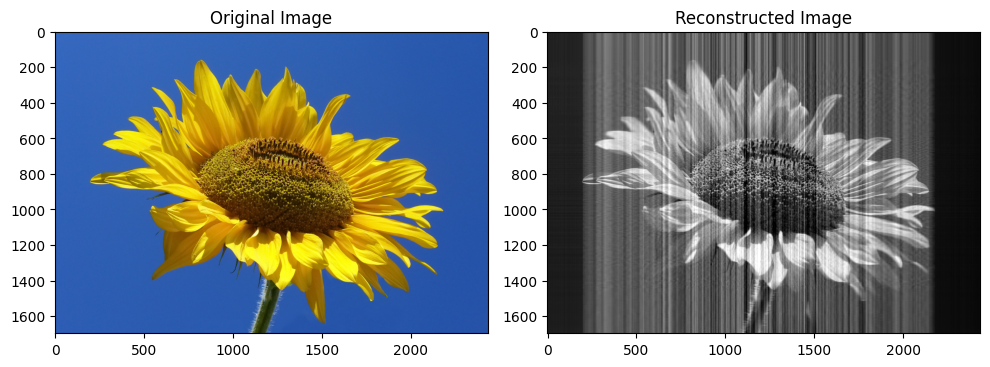

In [13]:
# Display the original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap="gray")
plt.title("Reconstructed Image")
plt.tight_layout()
plt.show()